# 4. Recovery of dysregulated elements in response to cancer mutations

In [1]:
import networkcommons as nc
import pandas as pd
import numpy as np

In [2]:
nc.data.omics.datasets()

{'decryptm': 'Drug perturbation proteomics and phosphoproteomics data',
 'panacea': 'Pancancer Analysis of Chemical Entity Activity RNA-Seq data',
 'test': 'Small RNA-Seq data for unit tests',
 'moon': 'Database files for running MOON',
 'cosmos': 'Database files for running COSMOS (MetaPKN)',
 'CPTAC': 'Clinical Proteomic Tumor Analysis Consortium data'}

In [3]:
nc.data.omics.cptac_cohortsize()

,Cancer_type,Tumor,Normal
0,BRCA,122,0
1,CCRCC,103,80
2,COAD,110,100
3,GBM,99,0
4,HNSCC,108,62
5,LSCC,108,99
6,LUAD,110,101
7,OV,83,20
8,PDAC,105,44
9,UCEC,95,18


In [4]:
nc.data.omics.cptac_fileinfo()

,File name,Description
0,XXXX_methylation_gene_meta_value_Normal.txt,"Methylation, gene level meta value, normal samples"
1,XXXX_methylation_gene_meta_value_Tumor.txt,"Methylation, gene level meta value, tumor samples"
2,XXXX_miRNAseq_mature_miRNA_RPM_log2_Normal.txt,"miRNAseq, Log2(mature miRNA RPM) of normal samples"
3,XXXX_miRNAseq_mature_miRNA_RPM_log2_Tumor.txt,"miRNAseq, Log2(mature miRNA RPM) of tumor samples"
4,XXXX_phospho_site_abundance_log2_reference_intensity_normalized_Normal.txt,"Phosphoproteomics, Log2(phospho site MS1 intensity), reference intensity normalized, isoform adjusted, normal samples"
5,XXXX_phospho_site_abundance_log2_reference_intensity_normalized_Tumor.txt,"Phosphoproteomics, Log2(phospho site MS1 intensity), reference intensity normalized, isoform adjusted, tumor samples"
6,XXXX_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt,"Global proteomics, Log2(gene level MS1 intensity), reference intensity normalized, normal samples"
7,XXXX_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt,"Global proteomics, Log2(gene level MS1 intensity), reference intensity normalized, tumor samples"
8,XXXX_RNAseq_circRNA_RSEM_UQ_log2_Normal.txt,"RNAseq, Log2(circRNA RSEM), UQ normalized by linear gene expression, normal samples"
9,XXXX_RNAseq_circRNA_RSEM_UQ_log2_Tumor.txt,"RNAseq, Log2(circRNA RSEM), UQ normalized by linear gene expression, tumor samples"


In [5]:
nc.data.omics.cptac_datatypes()


['metadata', 'methylation', 'mirna', 'phosphoproteome', 'proteome', 'rna']

In [6]:
cptac_transcriptomics_tumor = nc.data.omics.cptac_table('rna', 'LSCC', 'RNAseq_gene_RSEM_coding_UQ_1500_log2_Tumor')
cptac_proteomics_tumor = nc.data.omics.cptac_table('proteome', 'LSCC', 'proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor')
cptac_phosphoproteomics_tumor = nc.data.omics.cptac_table('phosphoproteome', 'LSCC', 'phospho_site_abundance_log2_reference_intensity_normalized_Tumor')
cptac_transcriptomics_ctrl = nc.data.omics.cptac_table('rna', 'LSCC', 'RNAseq_gene_RSEM_coding_UQ_1500_log2_Normal')
cptac_proteomics_ctrl = nc.data.omics.cptac_table('proteome', 'LSCC', 'proteomics_gene_abundance_log2_reference_intensity_normalized_Normal')
cptac_phosphoproteomics_ctrl = nc.data.omics.cptac_table('phosphoproteome', 'LSCC', 'phospho_site_abundance_log2_reference_intensity_normalized_Normal')
cptac_meta = nc.data.omics.cptac_table('metadata', 'LSCC', 'meta')

In [7]:
transcriptomics = pd.merge(cptac_transcriptomics_ctrl, cptac_transcriptomics_tumor, left_on='idx', right_on='idx', how='outer', suffixes=('_ctrl', '_tumor'))
proteomics = pd.merge(cptac_proteomics_ctrl, cptac_proteomics_tumor, left_on='idx', right_on='idx', how='outer', suffixes=('_ctrl', '_tumor'))
phosphoproteomics = pd.merge(cptac_phosphoproteomics_ctrl, cptac_phosphoproteomics_tumor, left_on='idx', right_on='idx', how='outer', suffixes=('_ctrl', '_tumor'))

In [8]:
transcriptomics_meta = pd.DataFrame({'sample': transcriptomics.set_index('idx').columns.to_list()})
transcriptomics_meta['group'] = transcriptomics_meta['sample'].apply(lambda x: 'ctrl' if '_ctrl' in x else 'tumor')

In [9]:
proteomics_meta = pd.DataFrame({'sample': proteomics.set_index('idx').columns.to_list()})
proteomics_meta['group'] = proteomics_meta['sample'].apply(lambda x: 'ctrl' if '_ctrl' in x else 'tumor')

In [10]:
phosphoproteomics_meta = pd.DataFrame({'sample': phosphoproteomics.set_index('idx').columns.to_list()})
phosphoproteomics_meta['group'] = phosphoproteomics_meta['sample'].apply(lambda x: 'ctrl' if '_ctrl' in x else 'tumor')

In [11]:
def handle_missing_values(df, threshold=0.1):
    df = df.copy()
    
    # Check non-numeric columns. If only one, set it as index. If more, abort.
    non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
    if len(non_numeric_columns) == 1:
        df = df.set_index(non_numeric_columns[0])
    elif len(non_numeric_columns) > 1:
        raise ValueError(f"More than one non-numeric column found: {non_numeric_columns}")
    
    # Replace -inf values with nan
    df = df.replace(-np.inf, np.nan)
    
    na_percentage = df.isna().mean(axis=1)
    
    # Determine which rows to fill and which to drop
    to_fill = na_percentage < threshold
    to_drop = na_percentage >= threshold
    
    # Replace NAs with the mean of the row for rows to fill
    df.loc[to_fill] = df.loc[to_fill].apply(lambda row: row.fillna(row.mean()), axis=1)
    
    # Drop rows with NA percentage greater than or equal to threshold
    df = df[~to_drop]
    
    # Return index to column if necessary
    df = df.reset_index()
    
    filled_count = to_fill.sum()
    removed_count = to_drop.sum()
    
    print(f"Number of genes filled: {filled_count}")
    print(f"Number of genes removed: {removed_count}")

    return df


In [12]:
phosphoproteomics = handle_missing_values(phosphoproteomics)

Number of genes filled: 8681
Number of genes removed: 56800


In [13]:
nc.data.omics.datasets()

{'decryptm': 'Drug perturbation proteomics and phosphoproteomics data',
 'panacea': 'Pancancer Analysis of Chemical Entity Activity RNA-Seq data',
 'test': 'Small RNA-Seq data for unit tests',
 'moon': 'Database files for running MOON',
 'cosmos': 'Database files for running COSMOS (MetaPKN)',
 'CPTAC': 'Clinical Proteomic Tumor Analysis Consortium data'}

In [14]:
proteomics = handle_missing_values(proteomics)

Number of genes filled: 9442
Number of genes removed: 3318


In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pca(dataframe, metadata):
    """
    Plots the PCA (Principal Component Analysis) of a dataframe.

    Parameters:
        dataframe (pd.DataFrame): The input dataframe containing numeric columns.
        metadata (pd.DataFrame or array-like): The metadata associated with the dataframe or an array-like object representing the groups.

    Returns:
        pd.DataFrame: The dataframe with PCA results.

    Raises:
        ValueError: If the dataframe contains no numeric columns suitable for PCA.
    """

    # Check if the dataframe contains any non-numeric columns
    numeric_df = dataframe.set_index('idx').T
    if type(metadata) == pd.DataFrame:
        groups = metadata.group.values
    else:
        groups = metadata


    # Handle cases where there are no numeric columns
    if numeric_df.empty:
        raise ValueError("The dataframe contains no numeric columns suitable for PCA.")
    
    std_devs = numeric_df.std()
    zero_std_cols = std_devs[std_devs == 0].index
    if not zero_std_cols.empty:
        print(f"Warning: The following columns have zero standard deviation and will be dropped: {list(zero_std_cols)}")
        numeric_df.drop(columns=zero_std_cols, inplace=True)

    # Standardizing the Data
    standardized_data = (numeric_df - numeric_df.mean()) / numeric_df.std()

    # PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(standardized_data)
    
    # Creating a dataframe with PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
    pca_df['group'] = groups
    # Plotting
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='group', palette='viridis')
    plt.title('PCA Plot (PCA1 vs PCA2)')
    plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]*100:.2f}% of variance)')
    plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]*100:.2f}% of variance)')
    plt.grid()

    # Display the plot
    plt.show()
    
    return pca_df


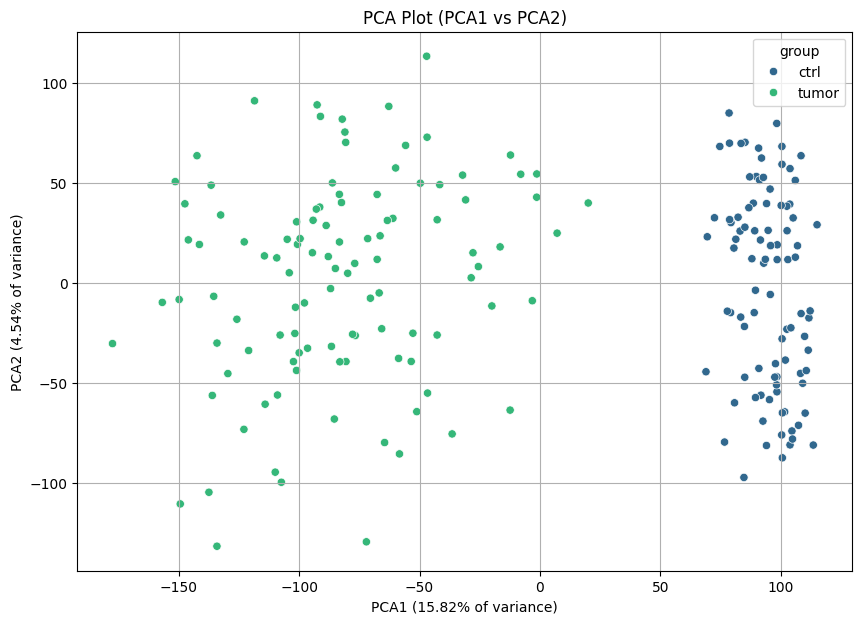

,PCA1,PCA2,group
0,106.909831,18.647228,ctrl
1,79.127035,-14.830357,ctrl
2,83.073833,26.008624,ctrl
3,80.513726,17.490855,ctrl
4,115.026522,29.163877,ctrl
...,...,...,...
197,-91.142362,83.413681,tumor
198,-83.077097,-39.457366,tumor
199,-58.328614,-85.557478,tumor
200,-134.083283,-30.067170,tumor


In [16]:
plot_pca(transcriptomics, transcriptomics_meta)

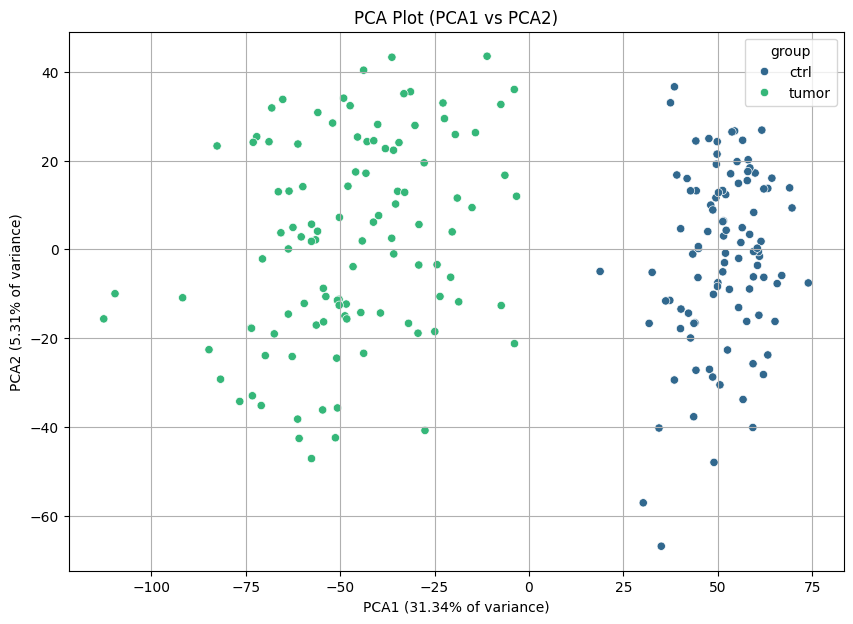

,PCA1,PCA2,group
0,43.622306,-37.733154,ctrl
1,44.305112,13.214247,ctrl
2,49.847993,24.287838,ctrl
3,59.430243,-6.199637,ctrl
4,48.995198,-48.026877,ctrl
...,...,...,...
202,-41.086690,24.496307,tumor
203,-51.976524,28.476863,tumor
204,-48.222467,-15.683694,tumor
205,-73.009733,24.133954,tumor


In [17]:
plot_pca(phosphoproteomics, phosphoproteomics_meta)

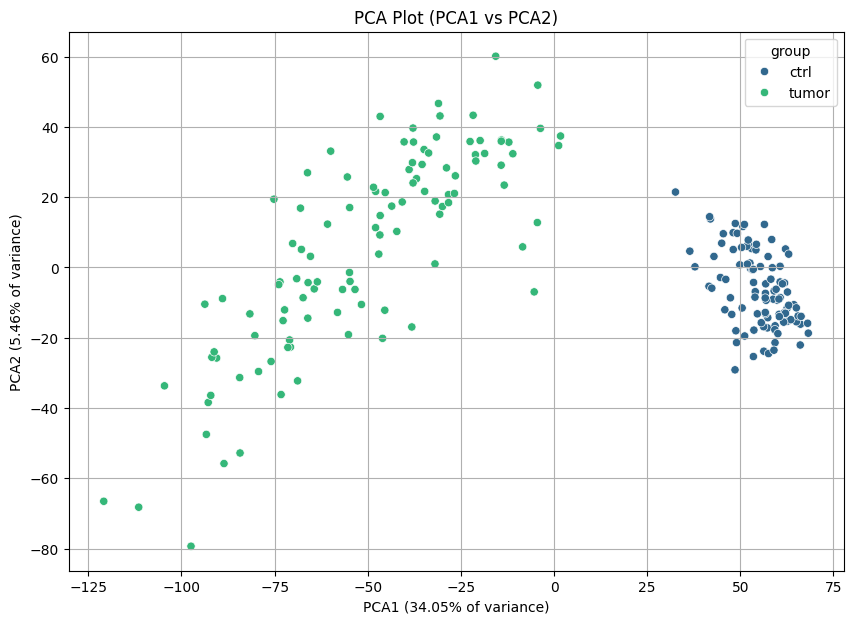

,PCA1,PCA2,group
0,56.460184,12.249523,ctrl
1,50.674229,11.655019,ctrl
2,58.424016,7.944426,ctrl
3,62.538869,-11.643720,ctrl
4,59.310804,-21.416624,ctrl
...,...,...,...
202,-48.453630,22.810071,tumor
203,-75.946722,-26.755689,tumor
204,-46.023526,-20.177193,tumor
205,-91.228312,-24.027213,tumor


In [18]:
plot_pca(proteomics, proteomics_meta)

In [19]:
import biomart
import pandas as pd
def get_ensembl_mappings():
    # Set up connection to server
    server = biomart.BiomartServer('http://ensembl.org/biomart')
    mart = server.datasets['hsapiens_gene_ensembl']
    
    # List the types of data we want
    attributes = ['ensembl_transcript_id', 'hgnc_symbol', 'ensembl_gene_id', 'ensembl_peptide_id']
    
    # Get the mapping between the attributes
    response = mart.search({'attributes': attributes})
    data = response.raw.data.decode('ascii')
    
    # Convert the raw data into a list of tuples
    data_tuples = [tuple(line.split('\t')) for line in data.splitlines()]
    
    # Convert the list of tuples into a dataframe
    df = pd.DataFrame(data_tuples, columns=['ensembl_transcript_id', 'gene_symbol', 'ensembl_gene_id', 'ensembl_peptide_id'])
    
    # Melt the dataframe to long format
    melted_df = pd.melt(df, id_vars=['gene_symbol'], value_vars=['ensembl_transcript_id', 'ensembl_gene_id', 'ensembl_peptide_id'],
                        var_name='ensembl_type', value_name='ensembl_id')
    
    # Drop rows with empty 'ensembl_id' and drop the 'ensembl_type' column
    melted_df = melted_df[melted_df['gene_symbol'] != ''].drop(columns=['ensembl_type'])
    
    # Set 'ensembl_id' as the index
    melted_df.drop_duplicates(inplace=True)
    
    return melted_df

In [20]:
from pypath.utils import mapping

In [21]:
def convert_ensembl_to_gene_symbol(dataframe, equivalence_df, column_name='idx', summarisation='mean'):
    """
    Converts Ensembl IDs to gene symbols using an equivalence dataframe, handles partial matches, 
    and summarizes duplicated entries by taking the maximum value.

    Parameters:
        dataframe (pd.DataFrame): The input dataframe with Ensembl IDs.
        equivalence_df (pd.DataFrame): The equivalence dataframe with Ensembl IDs as index and gene symbols.
        column_name (str): The name of the column containing Ensembl IDs in the input dataframe.

    Returns:
        pd.DataFrame: The dataframe with gene symbols and summarized duplicated entries.
    """
    dataframe = dataframe.copy()
    equivalence_df = equivalence_df.copy()

    if column_name not in dataframe.columns:
        dataframe.reset_index(inplace=True)

    # Extract partial match from the Ensembl IDs in the input dataframe
    dataframe['partial_id'] = dataframe[column_name].str.extract(r'([A-Za-z0-9]+)', expand=False)
    
    # Reset index of equivalence dataframe for merging
    # Merge dataframes using partial matches
    merged_df = pd.merge(dataframe, equivalence_df, left_on='partial_id', right_on='ensembl_id', how='left')
    
    # Calculate and print the number and percentage of non-matched Ensembl IDs
    total_count = len(merged_df)
    non_matched_count = merged_df['gene_symbol'].isna().sum()
    non_matched_percentage = (non_matched_count / total_count) * 100
    print(f"Number of non-matched Ensembl IDs: {non_matched_count} ({non_matched_percentage:.2f}%)")
    
    # Drop temporary and original index columns
    merged_df.drop(columns=['partial_id', 'ensembl_id', column_name], inplace=True)
    
    # Summarize duplicated entries by taking the max value
    if summarisation == 'max':
        summarized_df = merged_df.groupby('gene_symbol').max().reset_index()
    elif summarisation == 'min':
        summarized_df = merged_df.groupby('gene_symbol').min().reset_index()
    elif summarisation == 'mean':
        summarized_df = merged_df.groupby('gene_symbol').mean().reset_index()
    elif summarisation == 'median':
        summarized_df = merged_df.groupby('gene_symbol').median().reset_index()
    else:
        raise ValueError(f"Invalid summarisation method: {summarisation}")
    
    # Calculate and print the number and percentage of summarized duplicated entries
    summarized_count = len(merged_df) - len(summarized_df)
    summarized_percentage = (summarized_count / total_count) * 100
    print(f"Number of summarized duplicated entries: {summarized_count} ({summarized_percentage:.2f}%)")

    return summarized_df

In [22]:
transcriptomics

,idx,C3L-00081_ctrl,C3L-00415_ctrl,C3L-00445_ctrl,C3L-00568_ctrl,C3L-00603_ctrl,C3L-00904_ctrl,C3L-00923_ctrl,C3L-00927_ctrl,C3L-00993_ctrl,...,C3N-03851_tumor,C3N-03875_tumor,C3N-03877_tumor,C3N-03880_tumor,C3N-03882_tumor,C3N-03886,C3N-04124_tumor,C3N-04127_tumor,C3N-04155,C3N-04162_tumor
0,ENSG00000000003.15,9.1619,9.3218,8.8822,8.8718,9.6118,10.4317,9.9718,8.6323,9.3118,...,10.0918,10.5617,10.7817,9.6418,11.4716,10.4017,9.7217,10.4517,9.9219,11.0117
1,ENSG00000000005.6,1.4765,1.9343,1.7468,0.9565,0.9042,1.8829,1.8178,1.7328,0.0000,...,1.4384,1.3214,1.0009,1.5088,2.7509,1.1369,1.0160,1.9121,0.7763,1.4765
2,ENSG00000000419.12,9.4618,9.5618,9.4020,9.1718,9.3219,9.2818,9.3819,9.2020,9.3118,...,10.3017,9.9618,10.1117,9.7218,10.7817,9.7016,9.9217,10.9117,9.7019,9.2119
3,ENSG00000000457.14,9.7718,9.8017,9.2320,9.6418,9.8818,9.8818,9.8018,9.5219,9.3618,...,9.7618,10.0418,10.1617,10.2317,9.7218,11.4818,9.9317,9.6118,9.1322,9.8518
4,ENSG00000000460.17,7.8223,8.3819,8.0227,7.8720,8.0723,8.0322,8.1723,7.5332,7.7722,...,9.8118,9.0621,10.6017,9.7518,9.5219,11.6618,9.3917,8.7419,9.1921,9.6418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60664,ENSG00000288600.1,0.0000,1.9343,0.8362,1.5218,1.4510,0.0000,1.8178,0.8275,1.8975,...,0.0000,2.0031,2.0013,1.9195,0.0000,1.7595,0.0000,1.9121,0.0000,0.0000
60665,ENSG00000288601.1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
60666,ENSG00000288602.1,8.2021,7.1123,7.7130,7.4621,7.2728,7.5024,7.7626,7.5432,7.5623,...,6.7934,6.2860,8.1917,6.6127,7.5429,6.9997,6.3713,7.5223,6.8750,7.1427
60667,ENSG00000288603.1,0.9230,1.5218,2.0484,1.5218,0.0000,1.4765,1.4195,2.0332,0.0000,...,4.2522,2.0031,3.4616,3.3618,0.8630,2.2007,2.3454,2.8970,2.4021,0.9230


In [23]:
ensembl_mapping = get_ensembl_mappings()

In [24]:
transcriptomics_renamed = convert_ensembl_to_gene_symbol(transcriptomics, ensembl_mapping)

Number of non-matched Ensembl IDs: 19731 (32.52%)
Number of summarized duplicated entries: 19787 (32.61%)


In [25]:
proteomics_renamed = convert_ensembl_to_gene_symbol(proteomics, ensembl_mapping)

Number of non-matched Ensembl IDs: 4 (0.04%)
Number of summarized duplicated entries: 4 (0.04%)


In [26]:
phospho_renamed = convert_ensembl_to_gene_symbol(phosphoproteomics, ensembl_mapping, summarisation='max')

Number of non-matched Ensembl IDs: 6 (0.07%)
Number of summarized duplicated entries: 5128 (59.07%)


In [27]:
phospho_renamed

,gene_symbol,C3L-02665_ctrl,C3L-01663_ctrl,C3N-02575_ctrl,C3L-02546_ctrl,C3L-02963_ctrl,C3N-04162_ctrl,C3L-02646_ctrl,C3N-02285_ctrl,C3N-03875_ctrl,...,C3N-03425_tumor,C3L-02163_tumor,C3N-04124_tumor,C3L-00904_tumor,C3N-00211,C3N-01892_tumor,C3L-00603_tumor,C3L-03965_tumor,C3N-03851_tumor,C3L-02349_tumor
0,AAAS,24.275926,24.101283,23.987197,24.119863,23.882680,24.394344,23.611089,24.101571,23.783433,...,25.005383,26.081310,25.092048,25.413788,25.677721,25.255308,25.628862,25.452649,26.043817,24.633537
1,AAK1,25.917033,26.569911,25.705368,26.346144,25.955202,27.087531,26.248589,26.282038,25.705675,...,25.976824,27.113794,26.662843,26.988888,26.678631,26.373628,26.072315,26.092561,26.519967,27.230304
2,AAMDC,22.819563,21.826079,22.691178,23.192443,22.820261,22.443681,21.879653,22.643164,22.680505,...,21.099875,21.087095,21.111460,22.242061,22.438610,22.033146,22.398249,22.363890,21.922698,22.442834
3,AATF,20.581292,20.599321,20.746265,20.237159,20.413021,20.796864,20.531675,20.169143,20.309904,...,21.730819,22.634497,21.845319,21.839427,22.708025,21.983304,22.253102,22.201914,22.808695,22.534047
4,ABCA1,22.342546,22.431811,21.858268,21.289312,21.559349,22.370049,23.145083,21.319914,21.593439,...,22.922177,22.841169,23.341498,23.090603,23.196050,23.616500,21.336909,22.432317,22.731630,21.667462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,ZSCAN29,21.734401,22.131858,21.732524,21.303783,21.382705,22.551066,21.625701,21.769143,21.462509,...,22.415874,22.256066,21.896109,22.050066,22.754431,22.178997,22.641500,22.410153,22.175851,22.388990
3549,ZSWIM8,24.693198,24.902007,24.843674,24.455396,24.233027,25.385753,24.442158,24.752156,24.416076,...,24.651938,24.668510,24.717647,23.953571,24.736631,24.636712,25.242978,24.762536,24.461120,24.978371
3550,ZYX,29.029933,27.931315,28.158897,29.539797,28.885777,27.784041,29.665808,28.938230,30.279475,...,27.504014,27.094772,26.862645,27.301502,27.208125,27.337581,27.086509,26.510555,27.214505,27.033792
3551,ZZEF1,24.505214,23.849682,23.589677,23.652965,23.244124,23.171668,23.123853,23.314675,23.387440,...,23.131391,23.270119,23.193203,23.423083,23.169714,23.307994,23.312081,23.156912,23.498789,22.894982


In [28]:
de_transcr = nc.data.omics.deseq2(transcriptomics_renamed, transcriptomics_meta, ref_group='ctrl', test_group='tumor', feature_col='gene_symbol', sample_col='sample', round_values=True)

Fitting size factors...
... done in 0.22 seconds.

Fitting dispersions...
... done in 13.81 seconds.

Fitting dispersion trend curve...
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 70.40 seconds.

Fitting LFCs...
... done in 15.68 seconds.

Calculating cook's distance...
... done in 0.63 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 6.71 seconds.



Log2 fold change & Wald test p-value: group tumor vs ctrl
              baseMean  log2FoldChange     lfcSE      stat        pvalue  \
gene_symbol                                                                
A1BG          4.742500        0.033628  0.094226  0.356882  7.211802e-01   
A1BG-AS1      7.340147       -0.079629  0.075575 -1.053649  2.920436e-01   
A1CF          3.119675        0.290504  0.117753  2.467060  1.362275e-02   
A2M          15.831610       -0.274551  0.051456 -5.335677  9.518893e-08   
A2M-AS1       7.674712       -0.285300  0.073876 -3.861859  1.125277e-04   
...                ...             ...       ...       ...           ...   
ZYG11B       11.223439       -0.064672  0.061131 -1.057921  2.900913e-01   
ZYX          11.118272       -0.108338  0.061389 -1.764769  7.760252e-02   
ZYXP1         0.000000             NaN       NaN       NaN           NaN   
ZZEF1        11.785252       -0.044394  0.059673 -0.743957  4.569025e-01   
ZZZ3         10.996321        

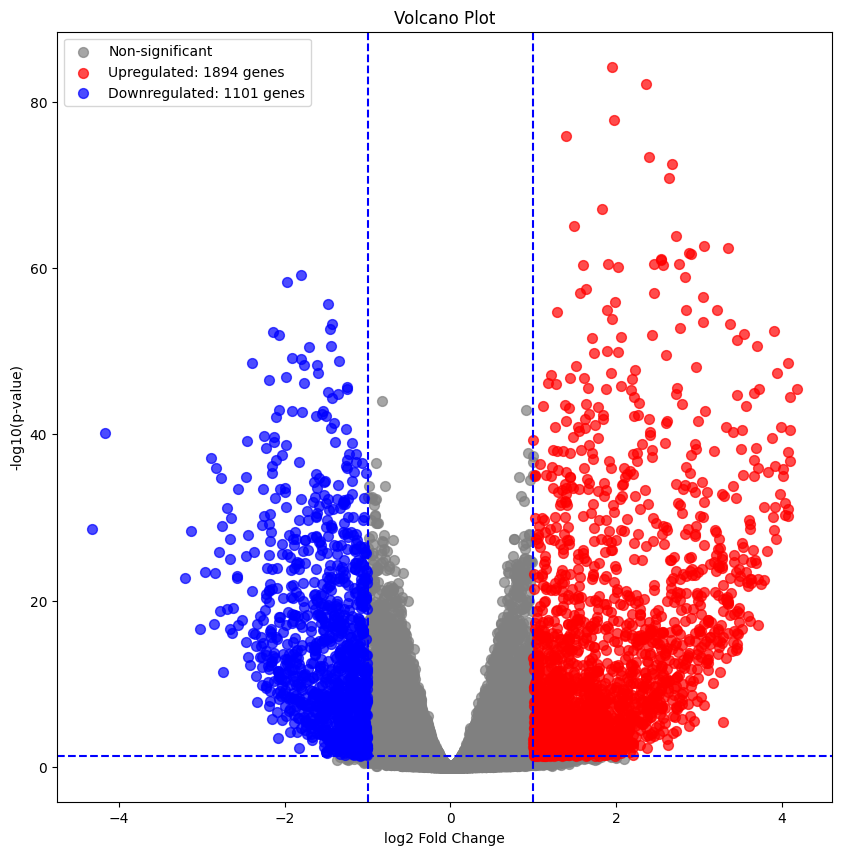

In [29]:
nc.visual.build_volcano_plot(data=de_transcr, log2fc='log2FoldChange', pval='padj')

In [30]:
de_prot = nc.data.omics.deseq2(proteomics_renamed, proteomics_meta, ref_group='ctrl', test_group='tumor', feature_col='gene_symbol', sample_col='sample', round_values=True)

Fitting size factors...
... done in 0.15 seconds.

Fitting dispersions...
... done in 11.09 seconds.

Fitting dispersion trend curve...
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.91 seconds.

/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site

Log2 fold change & Wald test p-value: group tumor vs ctrl
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene_symbol                                                                   
A1BG         28.680311       -0.056978  0.037471 -1.520619  0.128355  0.999779
A2M          30.319057       -0.081396  0.036438 -2.233837  0.025494  0.899615
A2ML1        24.020306        0.075093  0.041032  1.830124  0.067231  0.999779
AAAS         24.126653        0.012712  0.040889  0.310897  0.755879  0.999779
AACS         24.677737        0.051569  0.040460  1.274565  0.202463  0.999779
...                ...             ...       ...       ...       ...       ...
ZXDC         21.516271        0.051633  0.043331  1.191601  0.233418  0.999779
ZYG11B       22.695789       -0.035193  0.042131 -0.835325  0.403535  0.999779
ZYX          28.806004       -0.034987  0.037397 -0.935574  0.349492  0.999779
ZZEF1        25.020953       -0.000616  0.040143 -0.015336  0.987764  0.9

... done in 1.44 seconds.



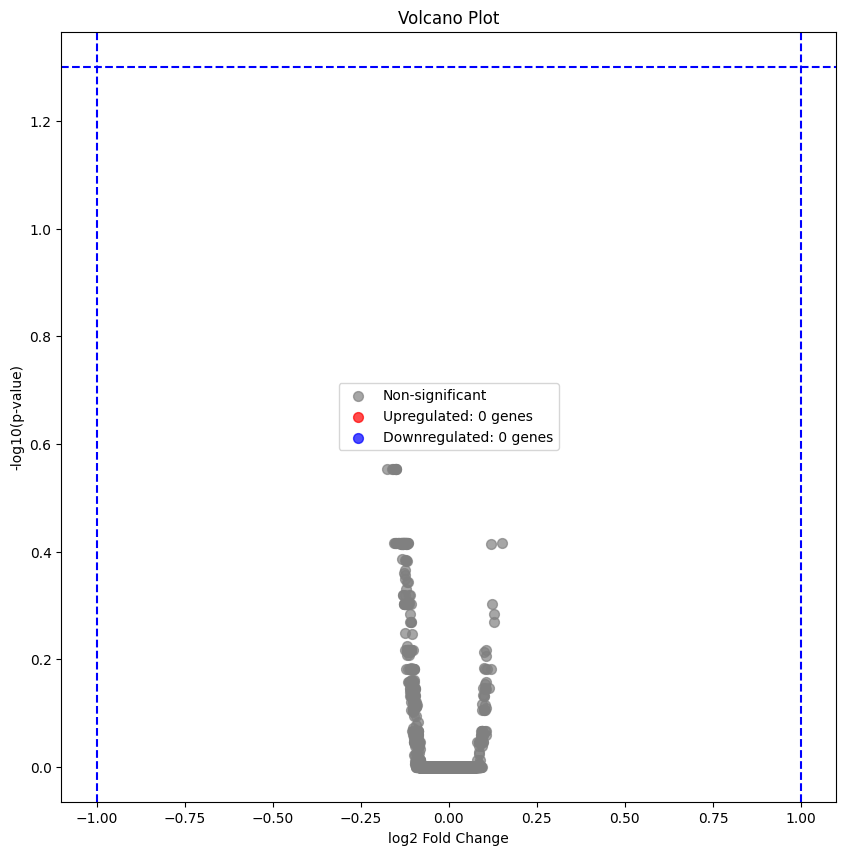

In [31]:
nc.visual.build_volcano_plot(data=de_prot, log2fc='log2FoldChange', pval='padj')

In [32]:
de_phospho = nc.data.omics.deseq2(phospho_renamed, phosphoproteomics_meta, ref_group='ctrl', test_group='tumor', feature_col='gene_symbol', sample_col='sample', round_values=True)

Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 2.77 seconds.

Fitting dispersion trend curve...
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/pydeseq2/dds.py:716: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 0.17 seconds.

/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Fitting MAP dispersions...
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-

Log2 fold change & Wald test p-value: group tumor vs ctrl
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
gene_symbol                                                                   
AAAS         24.755425        0.063898  0.040391  1.581984  0.113653  0.502252
AAK1         26.228863        0.026919  0.039210  0.686526  0.492381  0.875153
AAMDC        22.288849       -0.053229  0.042488 -1.252798  0.210279  0.672683
AATF         21.249186        0.093190  0.043628  2.136021  0.032678  0.253317
ABCA1        22.355326        0.037716  0.042480  0.887847  0.374623  0.799516
...                ...             ...       ...       ...       ...       ...
ZSCAN29      21.819184        0.053998  0.043013  1.255389  0.209338  0.671052
ZSWIM8       24.823590        0.000301  0.040286  0.007472  0.994038  0.998048
ZYX          27.954683       -0.089015  0.037930 -2.346815  0.018935  0.187918
ZZEF1        23.360520       -0.026850  0.041513 -0.646774  0.517778  0.8

... done in 0.65 seconds.



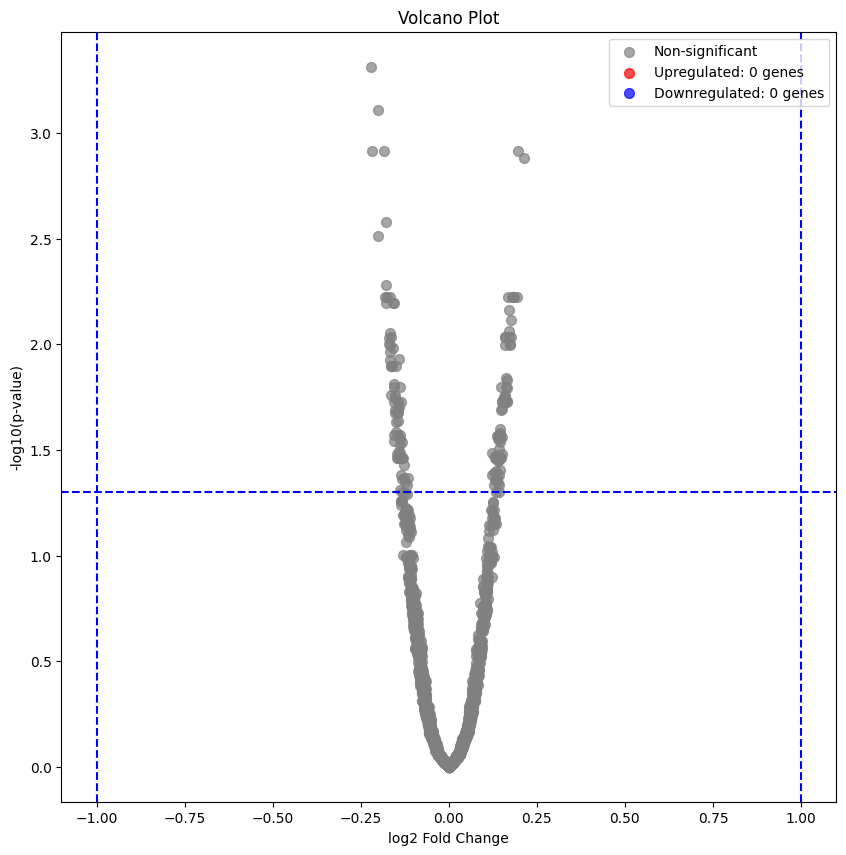

In [33]:
nc.visual.build_volcano_plot(data=de_phospho, log2fc='log2FoldChange', pval='padj')

In [34]:
de_transcr

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_symbol,,,,,,
A1BG,4.742500,0.033628,0.094226,0.356882,7.211802e-01,8.851900e-01
A1BG-AS1,7.340147,-0.079629,0.075575,-1.053649,2.920436e-01,5.052771e-01
A1CF,3.119675,0.290504,0.117753,2.467060,1.362275e-02,4.272665e-02
A2M,15.831610,-0.274551,0.051456,-5.335677,9.518893e-08,8.055039e-07
A2M-AS1,7.674712,-0.285300,0.073876,-3.861859,1.125277e-04,5.769840e-04
...,...,...,...,...,...,...
ZYG11B,11.223439,-0.064672,0.061131,-1.057921,2.900913e-01,5.031708e-01
ZYX,11.118272,-0.108338,0.061389,-1.764769,7.760252e-02,1.837438e-01
ZYXP1,0.000000,NaN,NaN,NaN,NaN,NaN


# prior knowledge

In [35]:
liana_receptors = nc.data.network.get_lianaplus()

In [36]:
receptors = set(liana_receptors.target)

In [37]:
receptors

{'FZD1',
 'PTPRC',
 'RXFP1',
 'ITGA3_ITGB1',
 'P2RX7',
 'OCLN',
 'SIGLEC6',
 'DSC1',
 'NRP1_NRP2_PLXND1',
 'SCN8A',
 'GPNMB',
 'LRP10',
 'IL18R1_IL18RAP',
 'COLEC12',
 'FGFR3',
 'TGFBR2',
 'CSPG4',
 'TLR1',
 'CD69',
 'KLRG1',
 'RYR1',
 'IL2RG',
 'MIP',
 'NCL',
 'ADORA1',
 'SELP',
 'FZD8_LRP6',
 'PTPRD',
 'IL22RA2',
 'CNTNAP1',
 'CLEC14A',
 'GP5',
 'LILRA4',
 'MUC6',
 'ACVR1_TGFBR1_TGFBR2',
 'FGFR4',
 'LPAR3',
 'GFRA3',
 'GFRAL',
 'KCNQ5',
 'A1BG',
 'EPHA6',
 'GHSR',
 'NRP1_PLXNA4',
 'FZD2_LRP5',
 'OR1G1',
 'PLXNB3',
 'ITGAD',
 'F2RL1',
 'TNFRSF9',
 'ST14',
 'GRM3',
 'KLRC2',
 'ITGA6_ITGB1',
 'XCR1',
 'CD19',
 'ITGB5',
 'RET',
 'IL6R',
 'SLC40A1',
 'TRAF2',
 'CD40',
 'PLXNC1',
 'IL20RA_IL20RB_IL2RG',
 'CD248',
 'HTR1B',
 'NTSR2',
 'PDCD1',
 'TNFRSF1A',
 'BDKRB1',
 'GRM1',
 'LRP4',
 'SIGLEC9',
 'CCKAR',
 'LTBR',
 'NOTCH4',
 'ITGAE_ITGB7',
 'S1PR4',
 'ASGR1',
 'ITGA9_ITGB1',
 'HRH3',
 'ALK',
 'PITPNM3',
 'CD44',
 'TLR9',
 'HMMR',
 'KLRG2',
 'TLR7',
 'PTPRF',
 'ACVR1B_ACVR2A_CFC1',
 'VLDLR

In [38]:
receptors_prot = de_prot[de_prot.index.isin(receptors)]

# Sort the DataFrame by the absolute values of the 'stat' column
top_receptors = receptors_prot.sort_values(by='stat', key=lambda x: x.abs(), ascending=False).head(5)

In [39]:
top_receptors

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_symbol,,,,,,
CCBE1,21.066737,-0.174563,0.043714,-3.993273,0.000065,0.279942
ACKR3,18.925230,0.151665,0.046328,3.273738,0.001061,0.384288
CAV1,29.096061,-0.121249,0.037191,-3.260141,0.001114,0.384288
AGER,28.719002,-0.120221,0.037435,-3.211485,0.001321,0.384288
CD36,25.557545,-0.127201,0.039683,-3.205461,0.001348,0.384288


In [40]:
source_dict = top_receptors['stat'].to_dict()

In [41]:
source_dict

{'CCBE1': -3.9932727390381553,
 'ACKR3': 3.27373754320016,
 'CAV1': -3.260141092502155,
 'AGER': -3.2114852998805614,
 'CD36': -3.205460719847366}

In [42]:
de_transcr

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_symbol,,,,,,
A1BG,4.742500,0.033628,0.094226,0.356882,7.211802e-01,8.851900e-01
A1BG-AS1,7.340147,-0.079629,0.075575,-1.053649,2.920436e-01,5.052771e-01
A1CF,3.119675,0.290504,0.117753,2.467060,1.362275e-02,4.272665e-02
A2M,15.831610,-0.274551,0.051456,-5.335677,9.518893e-08,8.055039e-07
A2M-AS1,7.674712,-0.285300,0.073876,-3.861859,1.125277e-04,5.769840e-04
...,...,...,...,...,...,...
ZYG11B,11.223439,-0.064672,0.061131,-1.057921,2.900913e-01,5.031708e-01
ZYX,11.118272,-0.108338,0.061389,-1.764769,7.760252e-02,1.837438e-01
ZYXP1,0.000000,NaN,NaN,NaN,NaN,NaN


In [43]:
import decoupler as dc

In [44]:
collectri = dc.get_collectri()

In [45]:
de_transcr.dropna(inplace=True)

In [46]:
decoupler_input = nc._utils.decoupler_formatter(de_transcr, 'stat')

In [47]:
dc_estimates, dc_pvals = dc.run_ulm(decoupler_input, collectri)

In [48]:
measurements = nc.utils.targetlayer_formatter(dc_estimates.T)

In [49]:
network = nc.data.network.get_omnipath()

In [50]:
graph = nc.utils.network_from_df(network)

In [73]:
networks = {}

In [74]:
networks['shortest_path'], shortest_paths_list = nc.methods.run_shortest_paths(graph, source_dict, measurements)

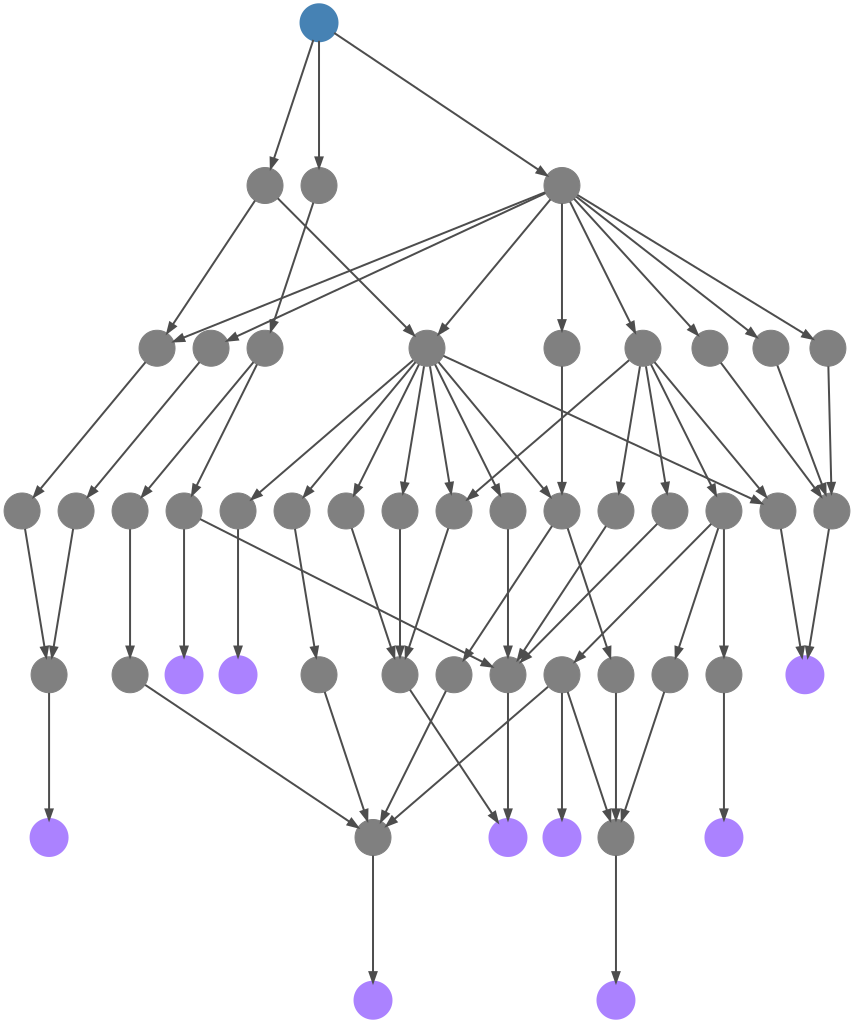

In [75]:
from IPython.display import HTML, display
a = nc.visual.visualize_graph_simple(networks['shortest_path'], source_dict, measurements, is_sign_consistent=False)
style = "<style>svg{width:25% !important;height:25% !important;</style>"
display(HTML(style))
display(a)

In [76]:
networks['shortest_sc_path'], shortest_sc_list = nc.methods.run_sign_consistency(networks['shortest_path'], shortest_paths_list, source_dict, measurements)

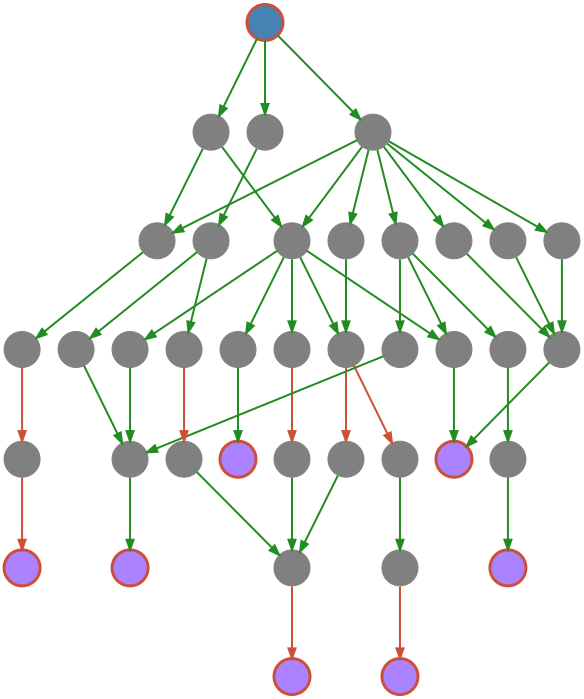

In [77]:
from IPython.display import HTML, display
a = nc.visual.visualize_graph_simple(networks['shortest_sc_path'], source_dict, measurements, is_sign_consistent=True)
style = "<style>svg{width:25% !important;height:25% !important;</style>"
display(HTML(style))
display(a)

In [87]:
networks['all_paths'], all_paths_list = nc.methods.run_all_paths(graph, source_dict, measurements, depth_cutoff=6)

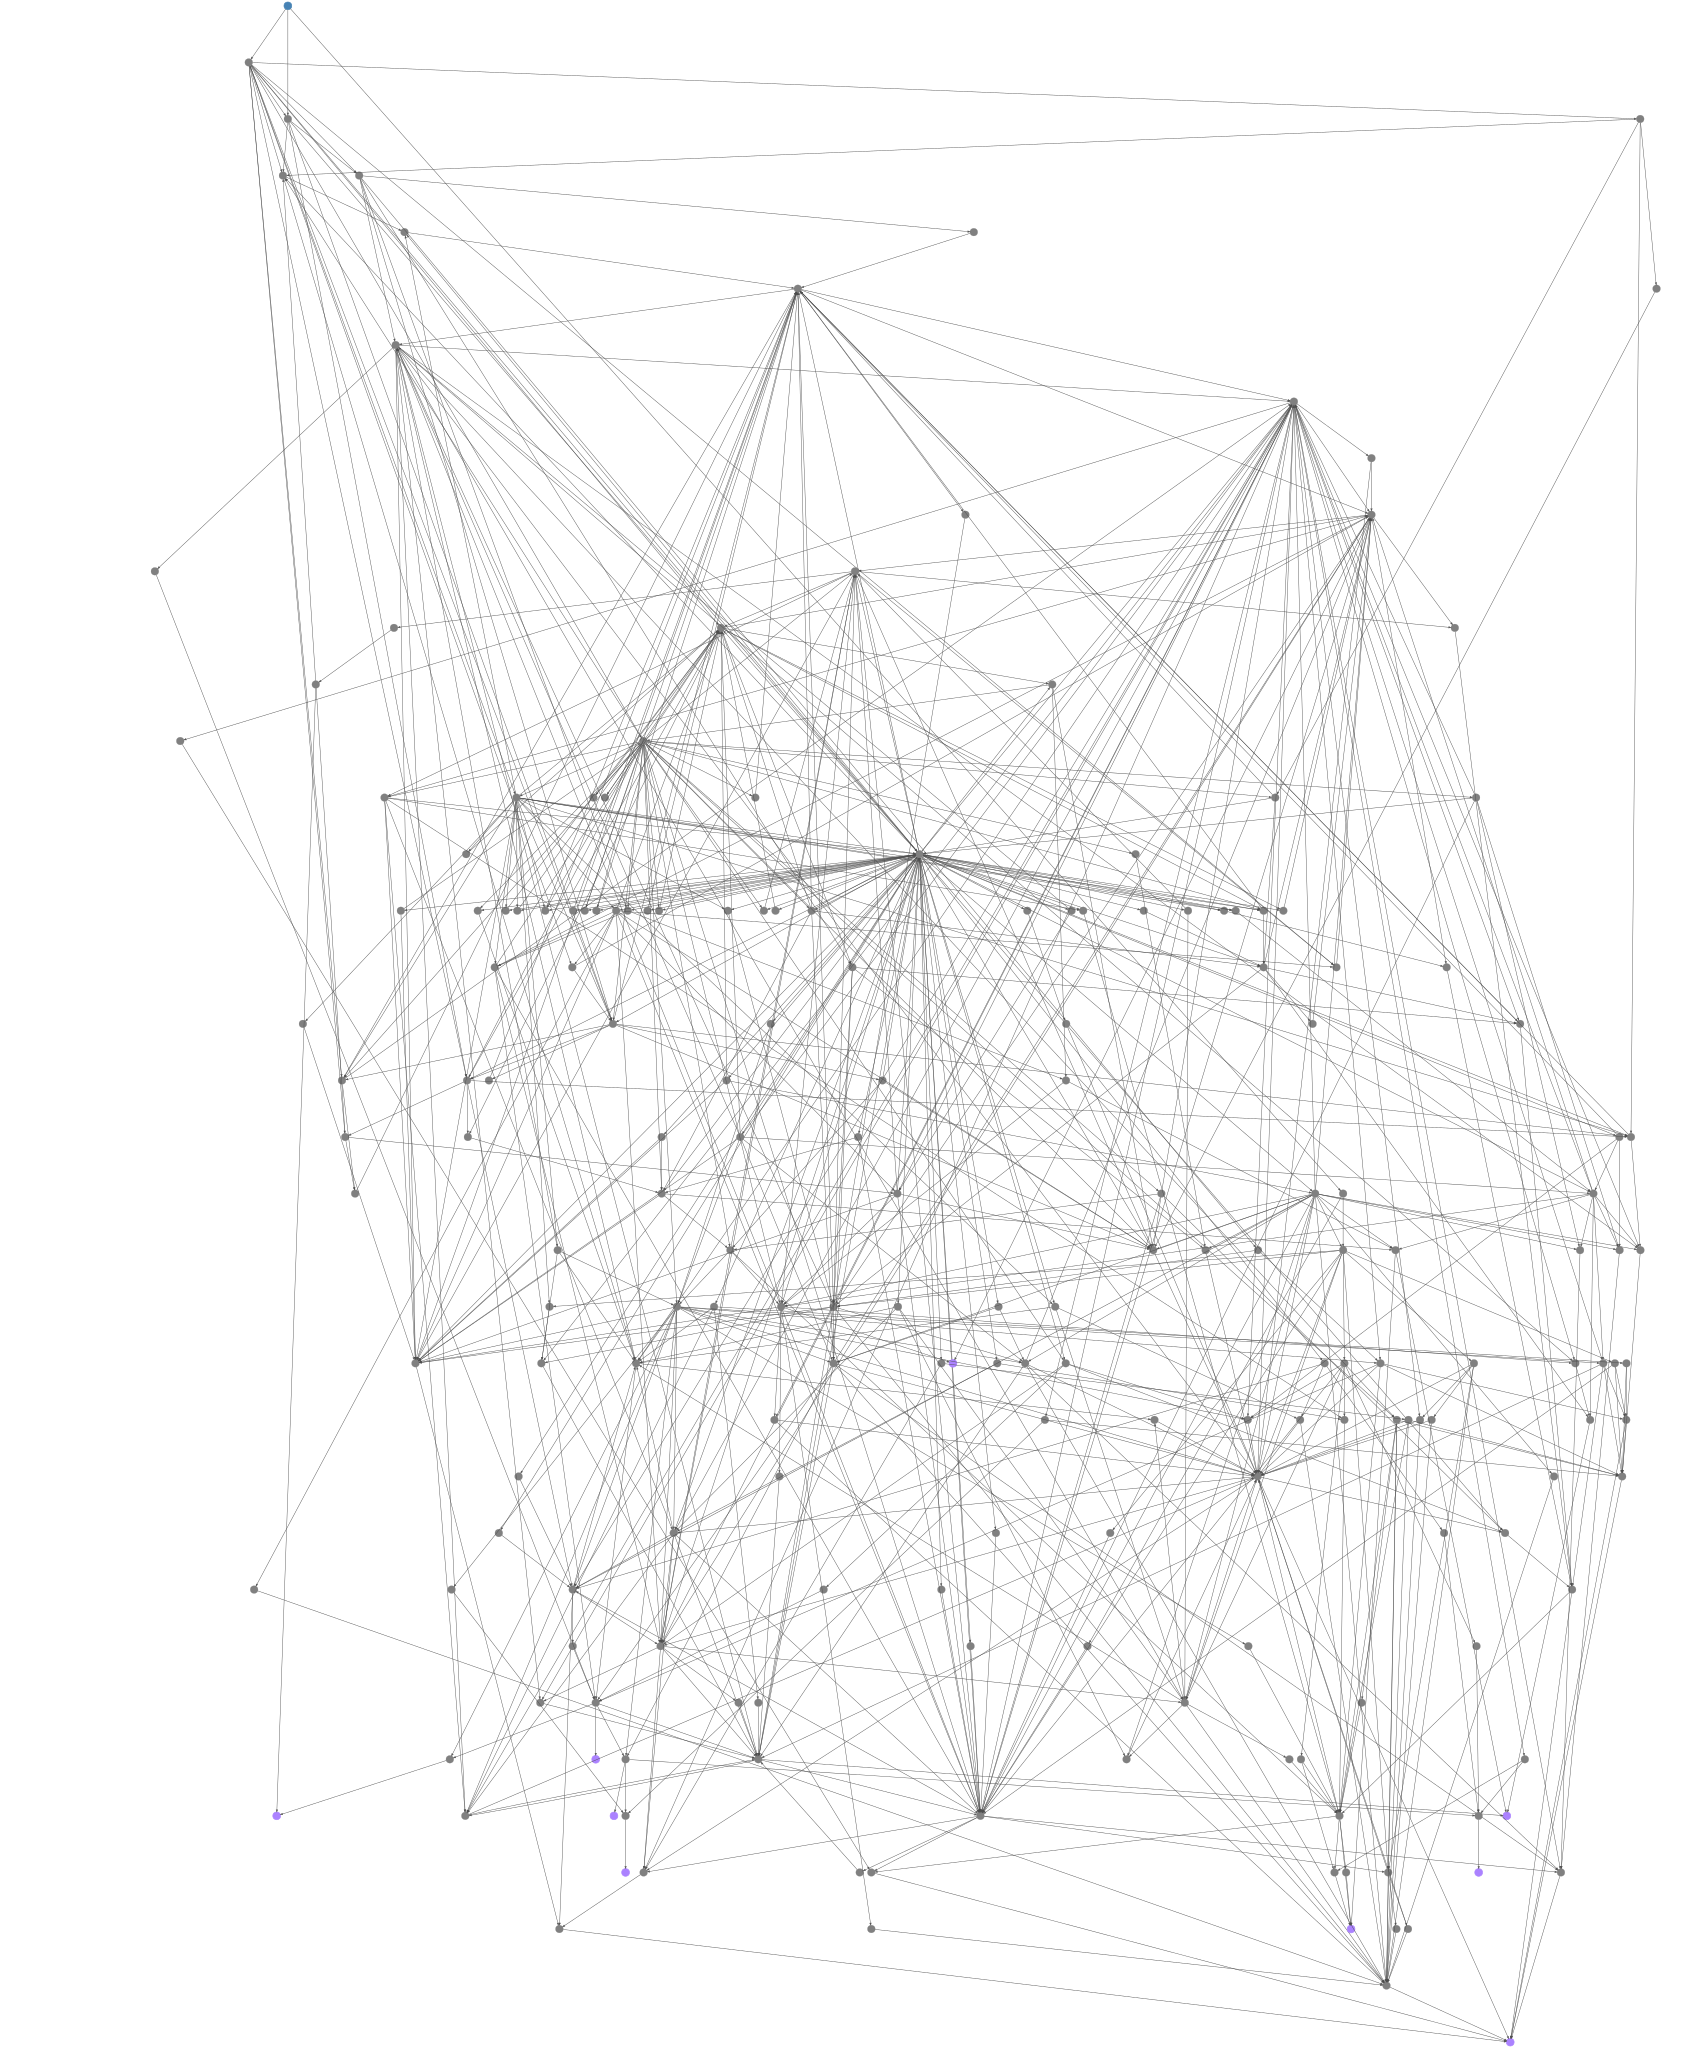

In [88]:
from IPython.display import HTML, display
a = nc.visual.visualize_graph_simple(networks['all_paths'], source_dict, measurements, is_sign_consistent=False)
style = "<style>svg{width:25% !important;height:25% !important;</style>"
display(HTML(style))
display(a)

In [90]:
networks['all_sc_paths'], allpaths_sc_list = nc.methods.run_sign_consistency(networks['all_paths'], all_paths_list, source_dict, measurements)

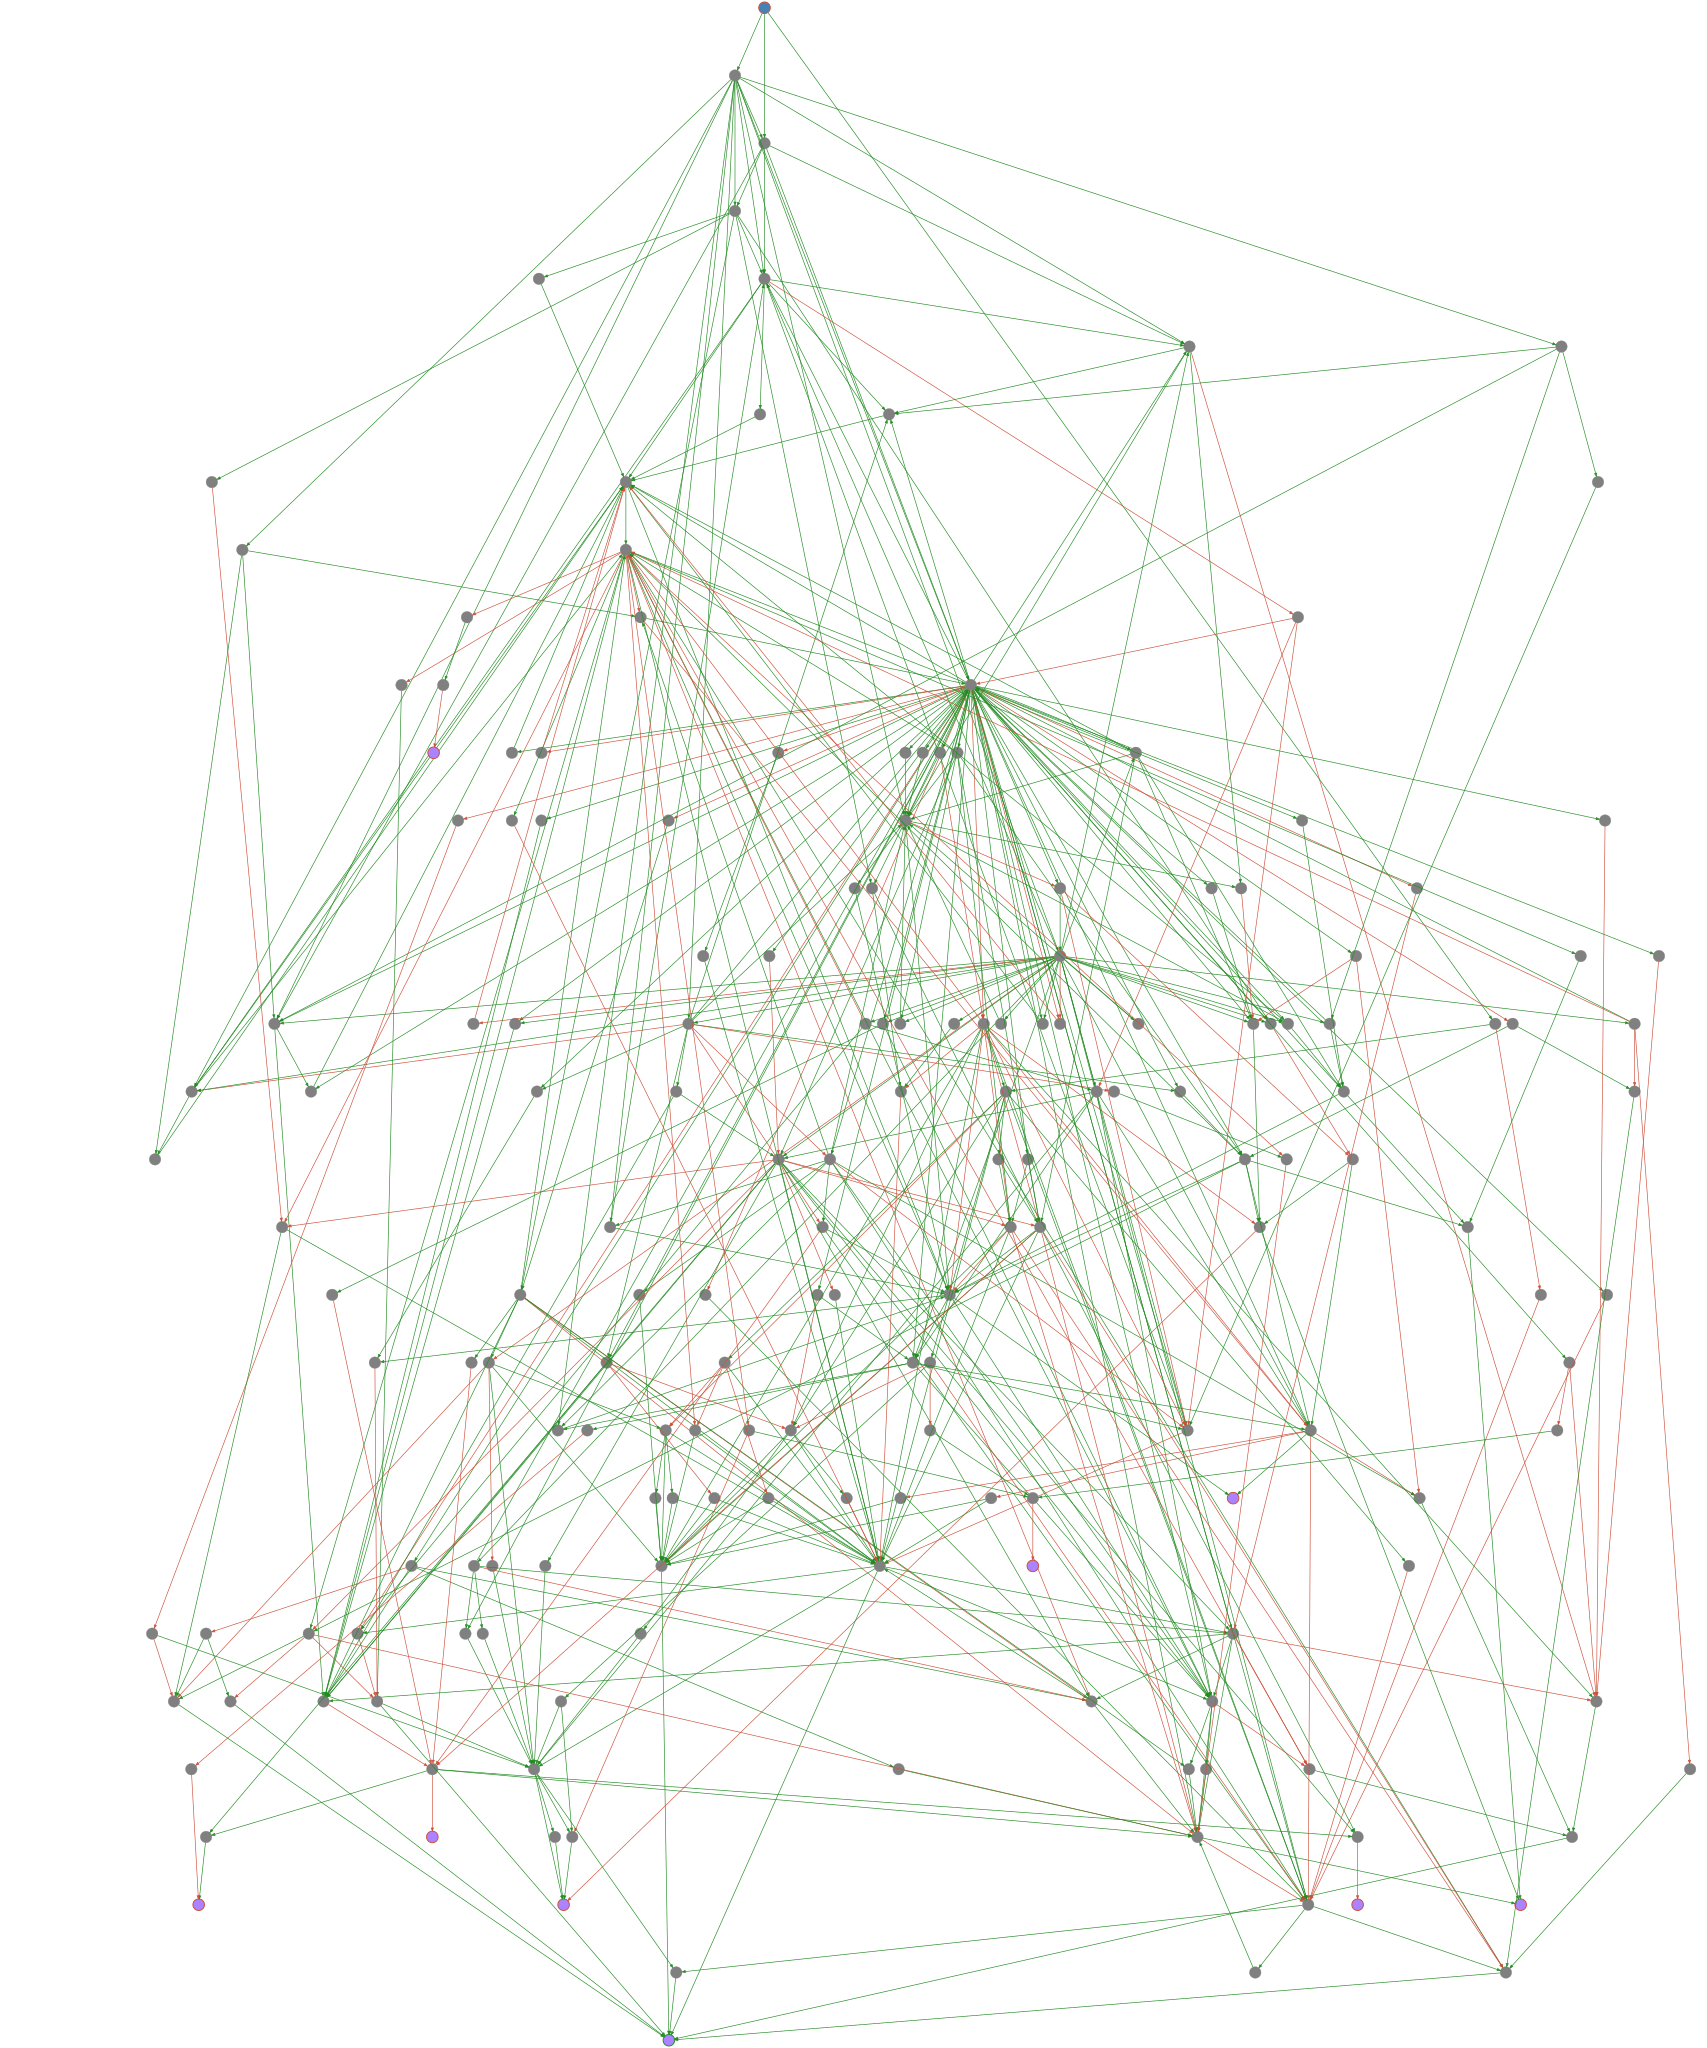

In [92]:
from IPython.display import HTML, display
a = nc.visual.visualize_graph_simple(networks['all_sc_paths'], source_dict, measurements, is_sign_consistent=True)
style = "<style>svg{width:25% !important;height:25% !important;</style>"
display(HTML(style))
display(a)

In [150]:
import random
import networkx as nx
def perform_random_controls(graph, inference_function, n_iterations, network_name, **kwargs):
    """
    Performs random controls of a network by shuffling node labels and running the inference function.
    
    Parameters:
    graph (nx.DiGraph): The original directed graph.
    inference_function (function): The network inference function to apply.
    n_iterations (int): The number of iterations to perform.
    network_name (str): The base name for the networks in the resulting dictionary.
    **kwargs: Additional keyword arguments to pass to the inference function.
    
    Returns:
    dict: A dictionary containing the inferred networks.
    """
    # Initialize the dictionary to store the networks
    inferred_networks = {}
    
    # Get the list of nodes
    nodes = list(graph.nodes)
    
    for i in range(n_iterations):
        # Shuffle the node labels
        shuffled_nodes = nodes[:]
        random.shuffle(shuffled_nodes)
        
        # Create a mapping from original to shuffled node labels
        mapping = {original: shuffled for original, shuffled in zip(nodes, shuffled_nodes)}
        
        # Relabel the nodes in the graph
        shuffled_graph = nx.relabel_nodes(graph, mapping, copy=True)
        
        # Perform the network inference on the shuffled graph
        inferred_network, _ = inference_function(shuffled_graph, **kwargs)
        
        # Add the inferred network to the dictionary with a unique name
        network_label = f"{network_name}__random{i+1:03d}"
        inferred_networks[network_label] = inferred_network
    
    return inferred_networks

In [151]:
sp_random_controls = perform_random_controls(graph, nc.methods.run_shortest_paths, 10, 'shortest_path', source_dict=source_dict, target_dict=measurements)

In [152]:
ap_random_controls = perform_random_controls(graph, nc.methods.run_all_paths, 10, 'all_paths', source_dict=source_dict, target_dict=measurements, depth_cutoff=6)

# evaluation

In [153]:
def subset_df_with_nodes(network, dataframe):
    """
    Subsets a dataframe using the nodes of a network as the index.

    Parameters:
    network (networkx.Graph): The network from which to extract nodes.
    dataframe (pd.DataFrame): The dataframe to subset.

    Returns:
    pd.DataFrame: A subset of the dataframe with rows that have indices matching the nodes of the network.
    """
    # Extract the nodes from the network
    nodes = list(network.nodes)

    # Subset the dataframe using the nodes as index
    subset_df = dataframe[dataframe.index.isin(nodes)]

    return subset_df

In [154]:
def get_phosphorylation_status(network, dataframe, col='stat'):
    subset_df = subset_df_with_nodes(network, dataframe)
    metric_in = subset_df[col].values
    excluded_df = dataframe[~dataframe.index.isin(subset_df.index)]
    metric_out = excluded_df[col].values
    coverage = len(subset_df) / len(network.nodes) * 100 if len(network.nodes) > 0 else 0

    return pd.DataFrame({
        'avg_relabundance': np.mean(metric_in),
        'avg_relabundance_overall': np.mean(dataframe[col].values),
        'diff_avg_abundance': abs(np.mean(metric_in)) - abs(np.mean(metric_out)),
        'nodes_with_phosphoinfo': len(subset_df),
        'coverage': coverage
    }, index=[0])

In [155]:
combined_dict = {}
combined_dict.update(networks)
combined_dict.update(sp_random_controls)
combined_dict.update(ap_random_controls)
combined_dict

{'shortest_path': <networkx.classes.digraph.DiGraph at 0x7fa6b95b4f10>,
 'shortest_sc_path': <networkx.classes.digraph.DiGraph at 0x7fa6d4209bd0>,
 'all_paths': <networkx.classes.digraph.DiGraph at 0x7fa6d41c5f90>,
 'all_sc_paths': <networkx.classes.digraph.DiGraph at 0x7fa65df82d40>,
 'shortest_path__random001': <networkx.classes.digraph.DiGraph at 0x7fa6e35c6e60>,
 'shortest_path__random002': <networkx.classes.digraph.DiGraph at 0x7fa6e35c4310>,
 'shortest_path__random003': <networkx.classes.digraph.DiGraph at 0x7fa6e35c64d0>,
 'shortest_path__random004': <networkx.classes.digraph.DiGraph at 0x7fa6e367cbe0>,
 'shortest_path__random005': <networkx.classes.digraph.DiGraph at 0x7fa6e8398c10>,
 'shortest_path__random006': <networkx.classes.digraph.DiGraph at 0x7fa6e8398040>,
 'shortest_path__random007': <networkx.classes.digraph.DiGraph at 0x7fa6e367f280>,
 'shortest_path__random008': <networkx.classes.digraph.DiGraph at 0x7fa6e367cac0>,
 'shortest_path__random009': <networkx.classes.dig

In [156]:
def get_metric_from_networks(networks, function, **kwargs):
    """
    Get the graph metrics of multiple networks.

    Args:
        networks (Dict[str, nx.Graph]): A dictionary of network names and
            their corresponding graphs.
        function (function): The function to get the graph metrics.
        target_dicts (Dict[str, dict]): A dictionary of target dictionaries
            for each network.

    Returns:
        DataFrame: The graph metrics of the networks.
    """
    metrics = pd.DataFrame()
    if function in globals():
        function = globals()[function]
    else:
        raise ValueError(f"Function {function} not found in available functions.")
    for network_name, graph in networks.items():
        network_df = function(graph, **kwargs)
        network_df['network'] = network_name
        if 'random' in network_name:
            network_df['type'] = 'random'
        else:
            network_df['type'] = 'real'
        network_df['method'] = network_name.split('__')[0]
        metrics = pd.concat([metrics, network_df])

    metrics.reset_index(inplace=True, drop=True)

    return metrics

In [157]:
phospho_results = get_metric_from_networks(combined_dict, 'get_phosphorylation_status', dataframe=de_phospho)

/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
/home/victo/.cache/pypoetry/virtualenvs/networkcommons-DX9y6Uxu-py3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide


In [158]:
phospho_results

,avg_relabundance,avg_relabundance_overall,diff_avg_abundance,nodes_with_phosphoinfo,coverage,network,type,method
0,-0.270619,-0.00868,0.263870,26,52.000000,shortest_path,real,shortest_path
1,-0.028841,-0.00868,0.020280,21,53.846154,shortest_sc_path,real,shortest_sc_path
2,-0.409875,-0.00868,0.406458,104,52.261307,all_paths,real,all_paths
3,-0.527950,-0.00868,0.522210,96,53.333333,all_sc_paths,real,all_sc_paths
4,NaN,-0.00868,NaN,0,0.000000,shortest_path__random001,random,shortest_path
5,0.271693,-0.00868,0.261665,17,22.077922,shortest_path__random002,random,shortest_path
6,0.600742,-0.00868,0.590515,9,25.714286,shortest_path__random003,random,shortest_path
7,0.390817,-0.00868,0.378621,31,31.313131,shortest_path__random004,random,shortest_path
8,0.757489,-0.00868,0.747080,8,21.052632,shortest_path__random005,random,shortest_path
9,-0.734045,-0.00868,0.727207,9,18.750000,shortest_path__random006,random,shortest_path


In [180]:
df = phospho_results

In [183]:
df

,avg_relabundance,avg_relabundance_overall,diff_avg_abundance,nodes_with_phosphoinfo,coverage,network,type,method
0,-0.270619,-0.00868,0.263870,26,52.000000,shortest_path,real,shortest_path
1,-0.028841,-0.00868,0.020280,21,53.846154,shortest_sc_path,real,shortest_sc_path
2,-0.409875,-0.00868,0.406458,104,52.261307,all_paths,real,all_paths
3,-0.527950,-0.00868,0.522210,96,53.333333,all_sc_paths,real,all_sc_paths
4,NaN,-0.00868,NaN,0,0.000000,shortest_path__random001,random,shortest_path
5,0.271693,-0.00868,0.261665,17,22.077922,shortest_path__random002,random,shortest_path
6,0.600742,-0.00868,0.590515,9,25.714286,shortest_path__random003,random,shortest_path
7,0.390817,-0.00868,0.378621,31,31.313131,shortest_path__random004,random,shortest_path
8,0.757489,-0.00868,0.747080,8,21.052632,shortest_path__random005,random,shortest_path
9,-0.734045,-0.00868,0.727207,9,18.750000,shortest_path__random006,random,shortest_path


In [187]:
summary_df

,method,type,avg_relabundance,avg_relabundance_overall,diff_avg_abundance,nodes_with_phosphoinfo,coverage
0,all_paths,random,0.082077,-0.00868,0.218758,52.0,25.071545
1,all_paths,real,-0.409875,-0.00868,0.406458,104.0,52.261307
2,all_sc_paths,real,-0.527950,-0.00868,0.522210,96.0,53.333333
3,shortest_path,random,0.179547,-0.00868,0.393495,15.5,24.129733
4,shortest_path,real,-0.270619,-0.00868,0.263870,26.0,52.000000
5,shortest_sc_path,real,-0.028841,-0.00868,0.020280,21.0,53.846154


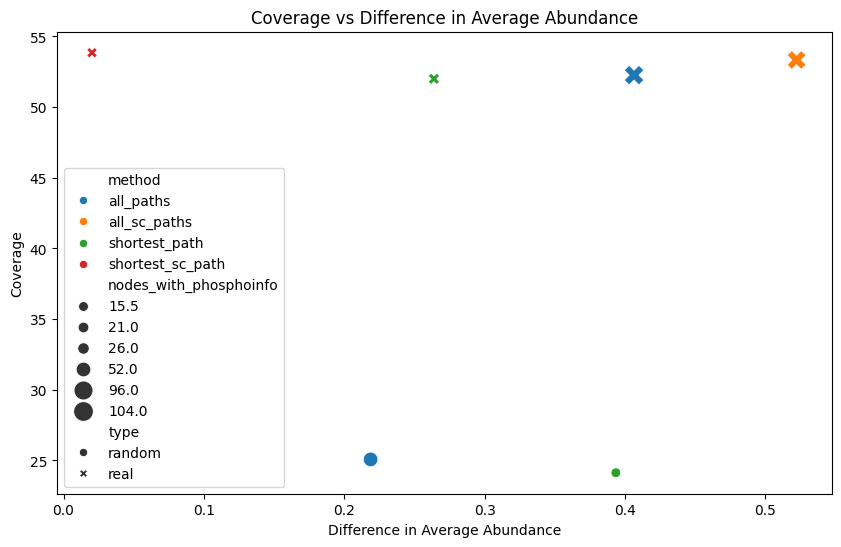

In [189]:
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=['number']).columns
# Group by 'method' and 'type' and calculate the mean for numeric columns
summary_df = df.groupby(['method', 'type'])[numeric_cols].mean().reset_index()


# Scatter plot with the size of the points representing the number of nodes with phosphoinfo
sns.scatterplot(data=summary_df, x='diff_avg_abundance', y='coverage', size='nodes_with_phosphoinfo', hue='method', style='type', sizes=(50, 200))

plt.xlabel('Difference in Average Abundance')
plt.ylabel('Coverage')
plt.title('Coverage vs Difference in Average Abundance')
plt.legend()
plt.show()


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot violin plots for each column in random_columns
plt.figure(figsize=(12, 6))
sns.violinplot(data=random_columns)
plt.title('Violin Plots per Column')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'random_columns' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
omnipath_network = nc.data.network.get_omnipath()
graph = nc.utils.network_from_df(omnipath_network)

In [218]:
nc.data.network.get_lianaplus()

,source,target,sign
0,LGALS9,PTPRC,1
1,LGALS9,MET,1
2,LGALS9,CD44,1
3,LGALS9,LRP1,1
4,LGALS9,CD47,1
...,...,...,...
4619,BMP2,ACTR2,1
4620,BMP15,ACTR2,1
4621,CSF1,CSF3R,1
4622,IL36G,IFNAR1,1


In [65]:
from pypath.utils import mapping
mapping.map_name('P00533', 'uniprot', 'genesymbol')

{'EGFR'}

In [ ]:
mapping.

AttributeError: module 'pypath' has no attribute 'utils'

In [ ]:
matches = mutations_table['idx'].str.contains('ENSG00000012048', na=False)


In [ ]:
mutations_table[matches]

,idx,01BR001,01BR008,01BR009,01BR010,01BR015,01BR017,01BR018,01BR020,01BR023,...,20BR005,20BR006,20BR007,20BR008,21BR001,21BR002,21BR010,22BR005,22BR006,604
158,ENSG00000012048.23,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
proteomics_profiles = nc.data.omics.cptac_table('BRCA', 'proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor')

In [ ]:
proteomics_profiles[proteomics_profiles['idx'].str.contains('ENSG00000141736', na=False)].to_dict()


{'idx': {6045: 'ENSG00000141736.13'},
 '11BR047': {6045: 24.8884627400894},
 '11BR043': {6045: 24.7099520921443},
 '11BR049': {6045: 24.6246806975416},
 '11BR023': {6045: 24.1821738509334},
 '18BR010': {6045: 24.6072139974011},
 '06BR003': {6045: 25.6268400975233},
 '11BR074': {6045: 24.8916994561209},
 '18BR017': {6045: 25.3456206004802},
 '01BR017': {6045: 27.295753820129},
 '06BR006': {6045: 26.6828283633141},
 '09BR005': {6045: 29.4902372836398},
 '11BR017': {6045: 25.8739120850528},
 '01BR015': {6045: 26.0498427187589},
 '11BR025': {6045: 25.0196933720531},
 '01BR001': {6045: 25.089198721935},
 '11BR031': {6045: 25.6231127473056},
 '01BR032': {6045: 25.5448138571496},
 '05BR045': {6045: 24.9993961140243},
 '11BR053': {6045: 24.22293716511},
 '01BR027': {6045: 24.1304287130313},
 '14BR008': {6045: 24.6806812793871},
 '18BR002': {6045: 23.9202028904236},
 '03BR013': {6045: 24.6028249366319},
 '11BR032': {6045: 23.989629985331},
 '21BR010': {6045: 24.9223669268047},
 '03BR004': {6045

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gene_data(df, ensembl_id=None):
    df = df.copy()
    # Compute average and standard error across columns, ignoring the 'idx' column
    df['average'] = df.iloc[:, 1:].mean(axis=1)
    df['stdev'] = df.iloc[:, 1:].std(axis=1)
    
    # Sort by average value
    df = df.sort_values('average').reset_index(drop=True)
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot the average intensity
    plt.plot(df['average'], label='Average Intensity')
    
    # Plot the shaded area for stderr
    plt.fill_between(df.index, df['average'] - df['stdev'], df['average'] + df['stdev'], color='gray', alpha=0.2, label='Standard Deviation')
    
    # Highlight the specific gene if ensembl_id is provided
    if ensembl_id:
        specific_gene = df[df['idx'].str.contains(ensembl_id, na=False)]
        if not specific_gene.empty:
            plt.scatter(specific_gene.index, specific_gene['average'], color='red', label=f'Highlighted Gene: {ensembl_id}', zorder=5, s=5)
    
    plt.title('Protein abundance Rank Plot')
    plt.xlabel('Proteins')
    plt.ylabel('Average Intensity')
    plt.legend()
    plt.tight_layout()
    plt.show()

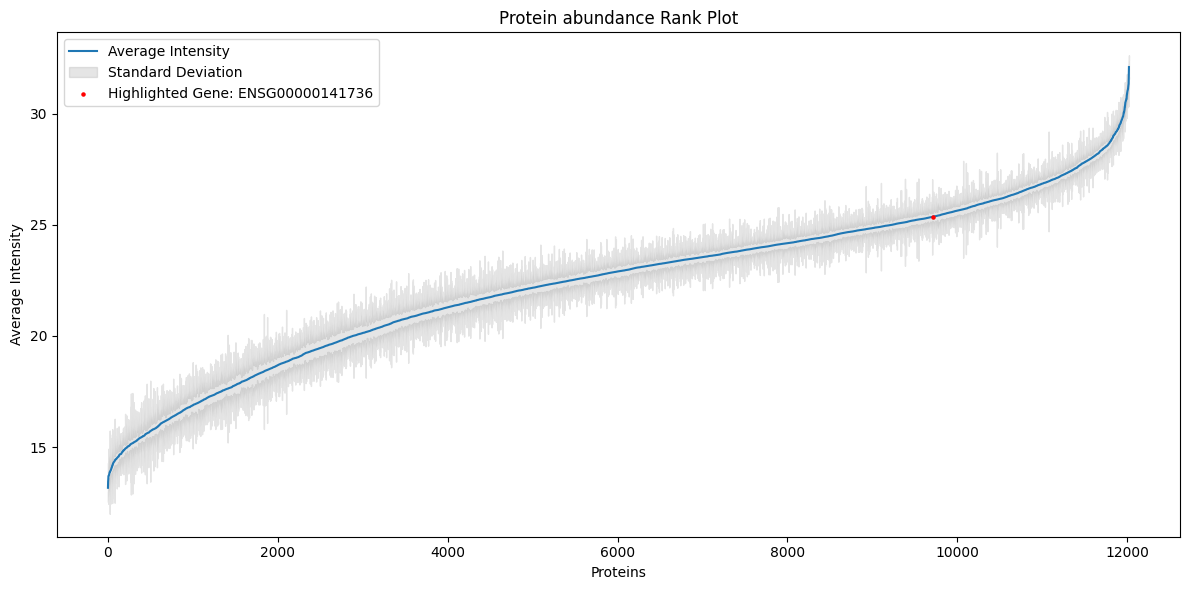

In [ ]:
plot_gene_data(proteomics_profiles, 'ENSG00000141736')

In [ ]:
def plot_density(df, ensembl_ids):
    # Ensure all relevant columns are numeric
    numeric_df = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    
    plt.figure(figsize=(12, 6))
    
    for ensembl_id in ensembl_ids:
        specific_gene = df[df['idx'].str.contains(ensembl_id, na=False)]
        if not specific_gene.empty:
            values = specific_gene.iloc[0, 1:].astype(float)
            values.plot(kind='density', label=f'Gene: {ensembl_id}')
            plt.axvline(values.mean(), color='k', linestyle='--', linewidth=1, label=f'Mean: {ensembl_id}')
            
            # Plot the interquartile range (IQR)
            Q10, q90 = np.percentile(values, [10, 90])
            plt.axvline(Q10, color='b', linestyle=':', linewidth=1, label=f'Q10: {ensembl_id}')
            plt.axvline(q90, color='b', linestyle=':', linewidth=1, label=f'Q90: {ensembl_id}')
    
    
    plt.title('Density Plot of Intensity Values')
    plt.xlabel('Intensity')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


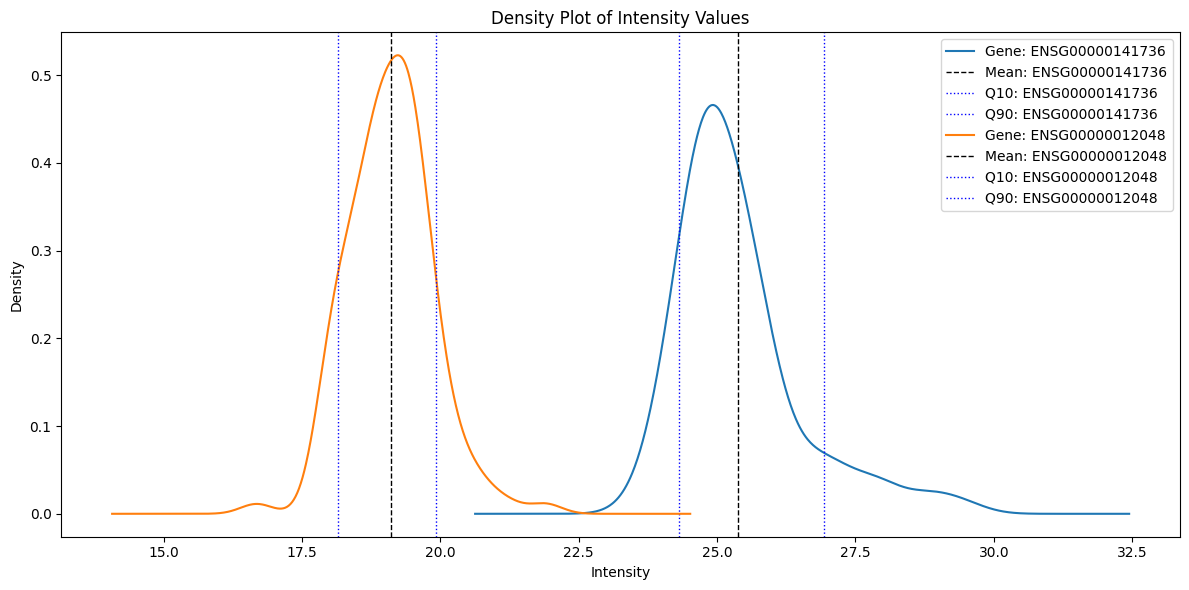

In [ ]:
plot_density(proteomics_profiles, ['ENSG00000141736', 'ENSG00000012048'])